**Amit Davidpur**

207496878

## Part 1 – NumPy, Matplotlib/Seaborn

### Q1: Convert covariance matrix into correlation matrix using numpy

#### A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification.

-----------
**Covariance** is a statistical measure that indicates the direction of the linear relationship between two variables. It assesses how much two variables change together from their mean values.

**Correlation** is a standardized measure of the strength and direction of the linear relationship between two variables. It is derived from covariance and ranges between -1 and 1. Unlike covariance, which only indicates the direction of the relationship, correlation provides a standardized measure.

https://www.geeksforgeeks.org/mathematics-covariance-and-correlation/#what-is-covariance




#### B. Load the Iris dataset and use visualization to explore the relationship between the different features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Iris dataset
df = pd.read_csv('Iris.csv', index_col='Id')

In [11]:
# Display first 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Data dimensions
df.shape

(150, 5)

In [13]:
# Checking information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


##### Use visualization to explore the relationship between the different features.

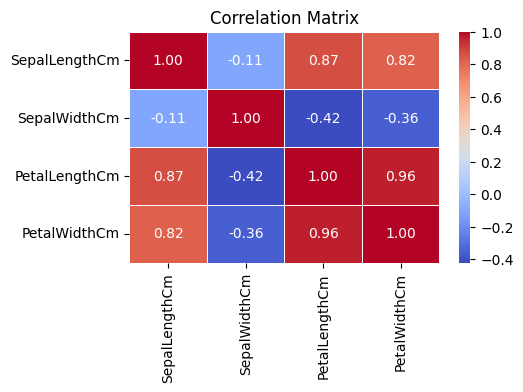

In [3]:
# Calculating the correlation matrix for numerical
correlation_matrix = df.select_dtypes(include=['float64']).corr()

# Plotting correlation as heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

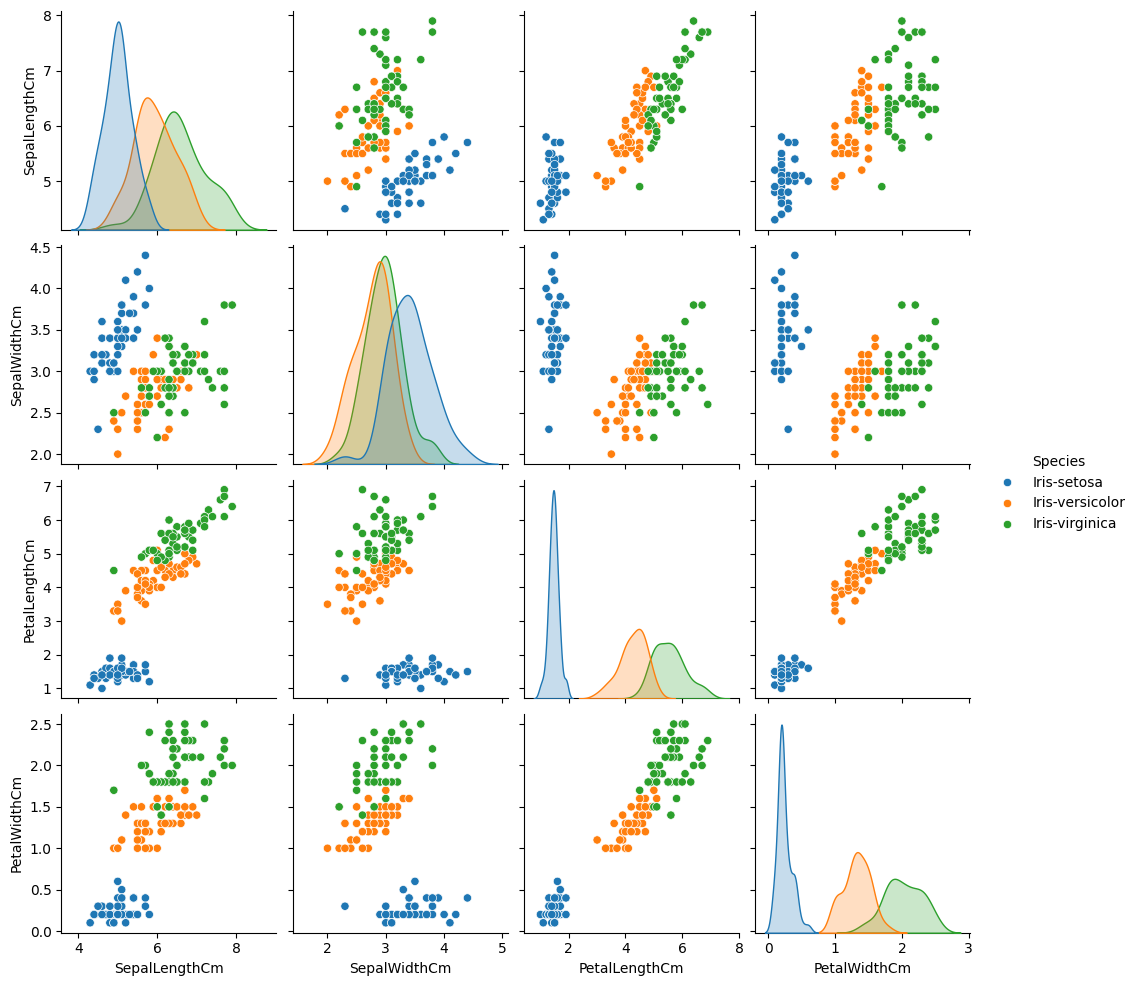

In [5]:
# Plotting pair-plot to visualize relationships between features
sns.pairplot(df, hue='Species')
plt.show()

#### C. Implement the functions:

**a.** A function to calculate the **covariance** between two variables

----

The covariance formula:

Cov(X,Y)=E[(X−EX)(Y−EY)]=E[XY]−(EX)(EY).

  https://www.probabilitycourse.com/chapter5/5_3_1_covariance_correlation.php

In [6]:
# A function to calculate the covariance between two variables.
def calcCov(x, y):
  # Calculate the mean of x*y
  e_xy = np.mean(x * y)
  # Calculate the mean of x
  e_x = np.mean(x)
  # Calculate the mean of y
  e_y = np.mean(y)

  # Calculate the covariance using the formula
  cov = e_xy - e_x * e_y
  return cov

**b.** A function to compute the **Covariance matrix**

In [7]:
# A function to compute the Covariance matrix.
def covMat(data):
  # The number of features
  n = data.shape[1]
  # Empty covariance matrix with zeros as num of features
  cov_matrix = np.zeros((n,n))

  # Loop through each feature pair and compute their covariance
  for i in range(n):
    for j in range(n):
      cov_matrix[i, j] = calcCov(data[:, i], data[:, j])

  return cov_matrix

#### D. Test1:

In [8]:
# Compare the results using the iris dataset.

# NumPy's np.cov(data,rowvar=False)
cov_pd = np.cov(df.select_dtypes(include=['float64']), rowvar=False)

# My function
cov_mat = covMat(df.select_dtypes(include=['float64']).values)

print(f'Results of np.cov: \n{cov_pd} \n\nResults of covMat: \n{cov_mat}')

Results of np.cov: 
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]] 

Results of covMat: 
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


#### E. Using your covariance function, implement a function to calculate the correlation matrix

----
Convert covariance to correlation:

Cov(X, Y) / (std(X) * std(Y))

In [9]:
# Function to calculate the correlation matrix
def corrMat(data):
  # Number of features
  n = data.shape[1]
  # Empty correlation matrix with zeros as num of features
  corr_matrix = np.zeros((n,n))

  # Calculate the correlation for each feature pair by formula
  for i in range(n):
    for j in range(n):
      # corr = cov(X, Y) / (std(X) * std(Y))
      corr_matrix[i, j] = calcCov(data[:, i], data[:, j]) / (np.std(data[:, i]) * np.std(data[:, j]))
  return corr_matrix


#### F. Test2:

In [10]:
# Compare the results using the iris dataset.

# NumPy's np.corrcoef(data,rowvar=False)
corr_pd = np.corrcoef(df.select_dtypes(include=['float64']), rowvar=False)

# My correlation matrix implementation
corr_mat = corrMat(df.select_dtypes(include=['float64']).values)

print(f'Results of np.corrcoef: \n{corr_pd} \n\nResults of corrMat: \n{corr_mat}')

Results of np.corrcoef: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]] 

Results of corrMat: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


#### G. Use visualizations to communicate the tests results.

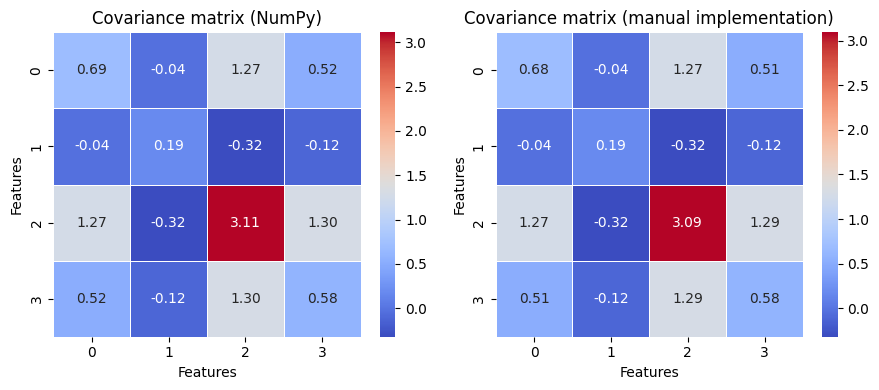

In [21]:
# Visualization of test 1 results

plt.figure(figsize=(9, 4))

# plot NumPy covariance matrix
plt.subplot(1, 2, 1)
sns.heatmap(cov_pd, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance matrix (NumPy)')
plt.xlabel('Features')
plt.ylabel('Features')

# Plot my covariance matrix
plt.subplot(1, 2, 2)
sns.heatmap(cov_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance matrix (manual implementation)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

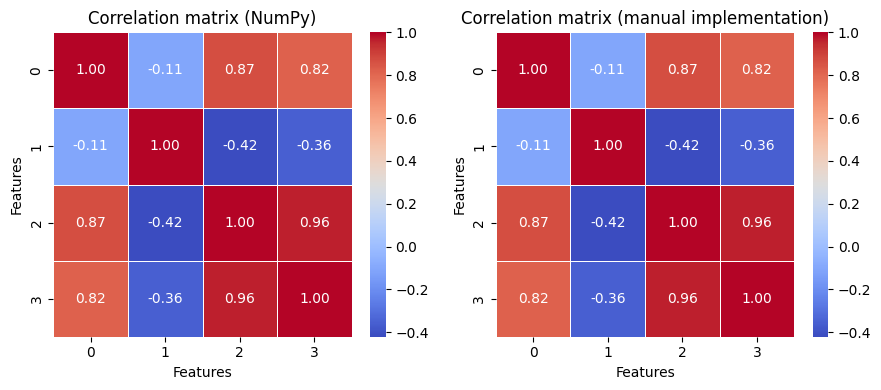

In [20]:
# Visualization of test 2 results

plt.figure(figsize=(9, 4))

# Plot NumPy covariance matrix
plt.subplot(1, 2, 1)
sns.heatmap(corr_pd, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix (NumPy)')
plt.xlabel('Features')
plt.ylabel('Features')

# Plot my covariance matrix
plt.subplot(1, 2, 2)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix (manual implementation)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

## Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:
### Q2: For this question you will use the dataset titled “laptop-price – dataset.csv”.

In [2]:
# Loading dataset
comp_df = pd.read_csv('laptop_price - dataset.csv')

In [23]:
# Display first 5 rows
comp_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [24]:
# Data dimensions
comp_df.shape

(1275, 15)

In [25]:
# Checking information about the columns
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

• Plot the price of all the laptops

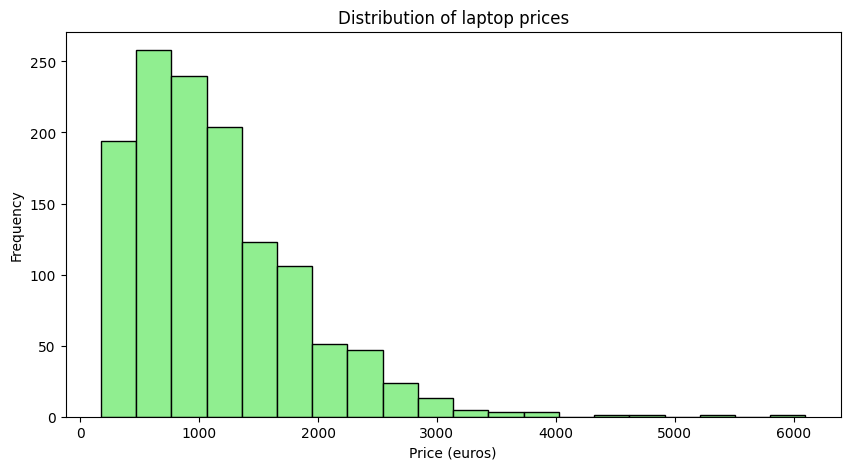

In [27]:
plt.figure(figsize=(10, 5))

# Histogram of laptop price distribution
plt.hist(comp_df['Price (Euro)'], bins=20, color='lightgreen', edgecolor='black')

# Add labels ad title
plt.title('Distribution of laptop prices')
plt.xlabel('Price (euros)')
plt.ylabel('Frequency')

plt.show()

• Which company has on average the most expensive laptop? What is the average
laptop price for each company?

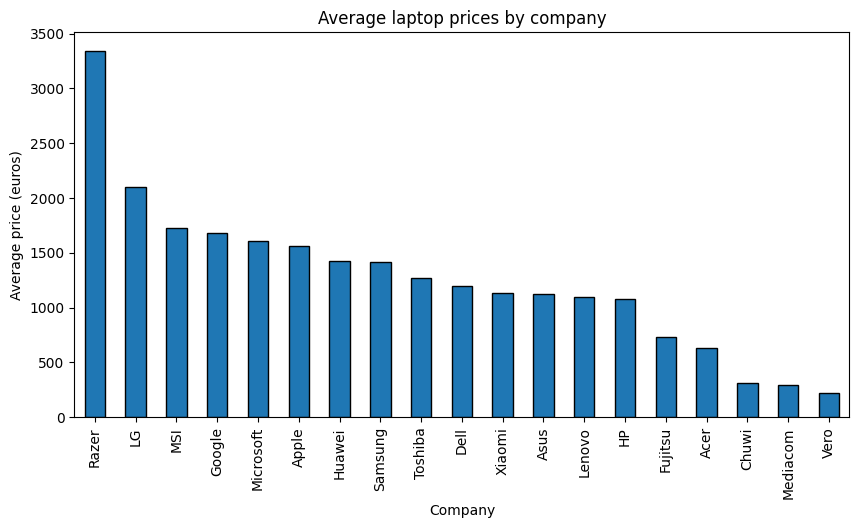

In [29]:
plt.figure(figsize=(10, 5))

# Group the dataset by company column and calculate the mean price per company
comp_df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False).plot(kind='bar', edgecolor='black')

# Add labels ad title
plt.title('Average laptop prices by company')
plt.xlabel('Company')
plt.ylabel('Average price (euros)')
plt.show()

• Find the different types of Operating systems present in the data - under the column name "OpSys".

In [13]:
# Check the values in the 'OpSys' column
comp_df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [30]:
# Replace 'Mac OS X' with 'macOS' and 'Windows 10 S' with 'Windows 10' for uniformity
comp_df['OpSys_unique'] = comp_df['OpSys'].str.replace('Mac OS X', 'macOS')
comp_df['OpSys_unique'] = comp_df['OpSys_unique'].str.replace('Windows 10 S', 'Windows 10')

# Check the values in the new column
comp_df['OpSys_unique'].value_counts()

,count
OpSys_unique,
Windows 10,1056
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,21
Android,2


• Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

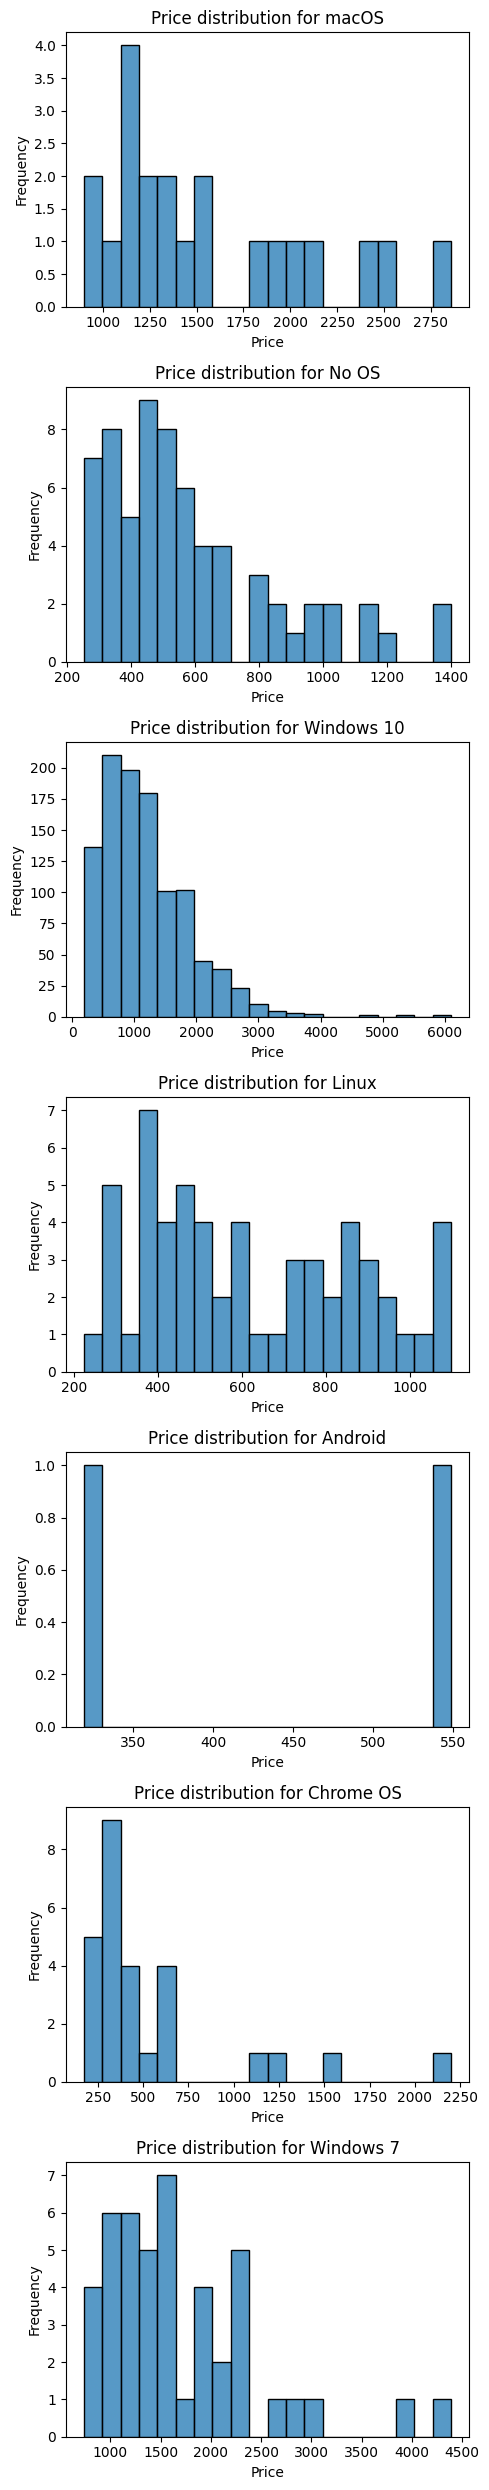

In [32]:
# Unique operating systems
unique_os = comp_df['OpSys_unique'].unique()

num = len(unique_os)
fig, axes = plt.subplots(nrows=num, ncols=1, figsize=(5, 25))

# Create a plot for each operating system
for ax, os in zip(axes, unique_os):
    sns.histplot(comp_df[comp_df['OpSys_unique'] == os]['Price (Euro)'], ax=ax, bins=20)

    # Add labels and title
    ax.set_title(f'Price distribution for {os}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


• What is the relationship between RAM and computer price? add an adequate plot to support your findings.

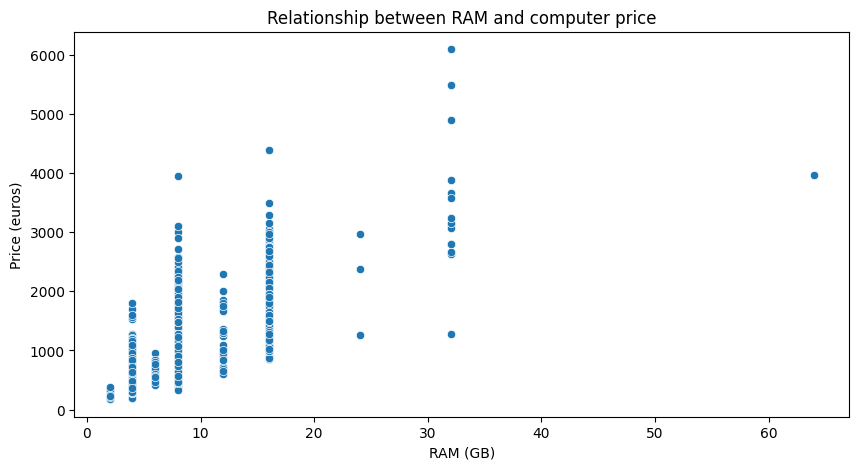

In [40]:
plt.figure(figsize=(10, 5))

# Scatter plot to show the relationship between RAM and price
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=comp_df)

# Add title an labels
plt.title('Relationship between RAM and computer price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (euros)')
plt.show()

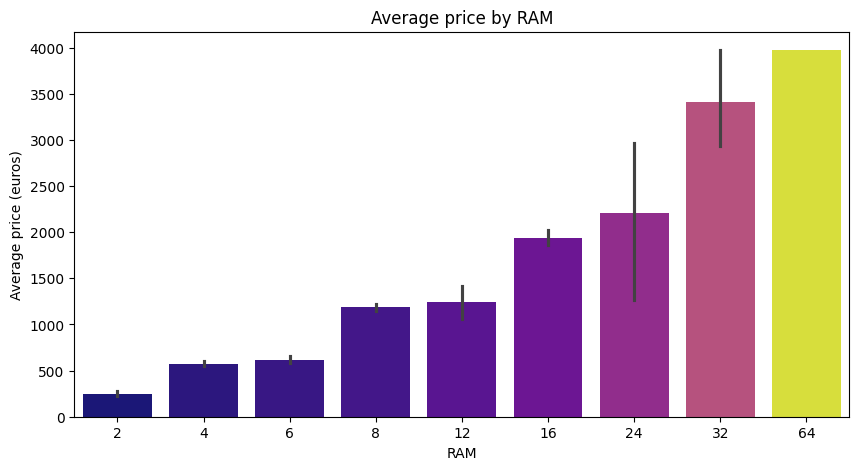

In [41]:
plt.figure(figsize=(10, 5))

# Bar plot showing the average price by RAM (GB),
sns.barplot(data=comp_df, x='RAM (GB)', y='Price (Euro)', palette='plasma', hue='RAM (GB)', legend=False)

# Add title and labels
plt.title('Average price by RAM')
plt.xlabel('RAM')
plt.ylabel('Average price (euros)')
plt.show()

• Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

In [27]:
# Check the values in the 'Memory' column
comp_df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,215
500GB HDD,124
512GB SSD,114
128GB SSD + 1TB HDD,94
128GB SSD,74
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16


In [44]:
# Function to extract storage types from memory column
def extract_storage_type(memory):
    storage_types = []
    if 'SSD' in memory:
        storage_types.append('SSD')
    if 'HDD' in memory:
        storage_types.append('HDD')
    if 'Flash Storage' in memory:
        storage_types.append('Flash Storage')
    if 'Hybrid' in memory:
        storage_types.append('Hybrid')
    return ' + '.join(storage_types)

# Apply the function to create the new column
comp_df['Storage type'] = comp_df['Memory'].apply(extract_storage_type)

# Verify the results
print(comp_df['Storage type'].value_counts())
comp_df[['Memory', 'Storage type']].head(10)

Storage type
SSD                    635
HDD                    359
SSD + HDD              200
Flash Storage           70
Hybrid                   8
SSD + Hybrid             2
HDD + Flash Storage      1
Name: count, dtype: int64


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD


### Q3: Think of additional questions related to this data. What types of analyses and visualizations would you use to address them?

Submit your list of questions, suggested analyses and visualizations and the implementation.

**1.** What is the relationship between memory and price?
* I would plot a scatter plot of memory vs. price to visualize any linear or non-linear relationships.

**2.** Which companies produce the most lightweight laptops?
* I would calculate the average weight of laptops for each company and sort them by weight. A bar plot would display the average laptop weight for each company.

**3.** What is the relationship between RAM size and CPU frequency?
* I would determine the correlation between RAM size and CPU frequency and create a scatter plot to visualize the relationship.

**4.** What is the relationship between screen size and laptop weight?
* I would plot the data using a line plot to show the trend with screen size on the x-axis and weight on the y-axis.

Select two questions from your list and implement.

The correlation coefficient = 0.37


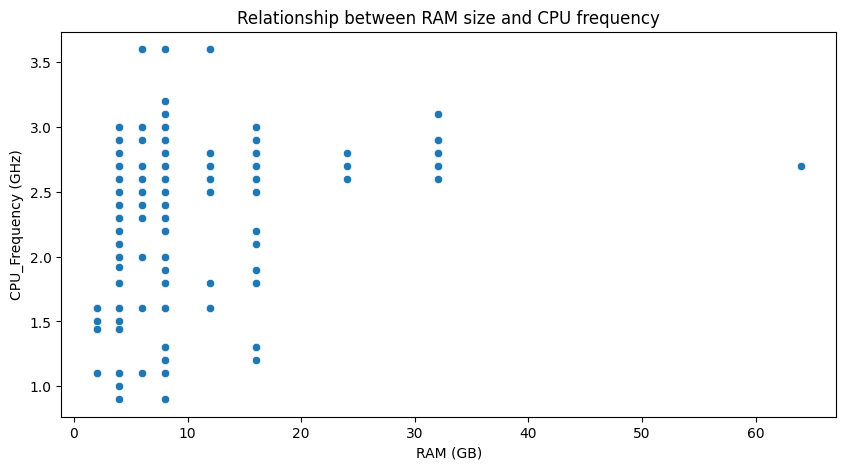

In [51]:
# What is the relationship between RAM size and CPU frequency?

# determine the correlation
corr = comp_df['RAM (GB)'].corr(comp_df['CPU_Frequency (GHz)'])
print(f"The correlation coefficient = {round(corr, 2)}")

# create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(data=comp_df, x='RAM (GB)', y='CPU_Frequency (GHz)')
plt.title('Relationship between RAM size and CPU frequency')
plt.xlabel('RAM (GB)')
plt.ylabel('CPU_Frequency (GHz)')
plt.show()

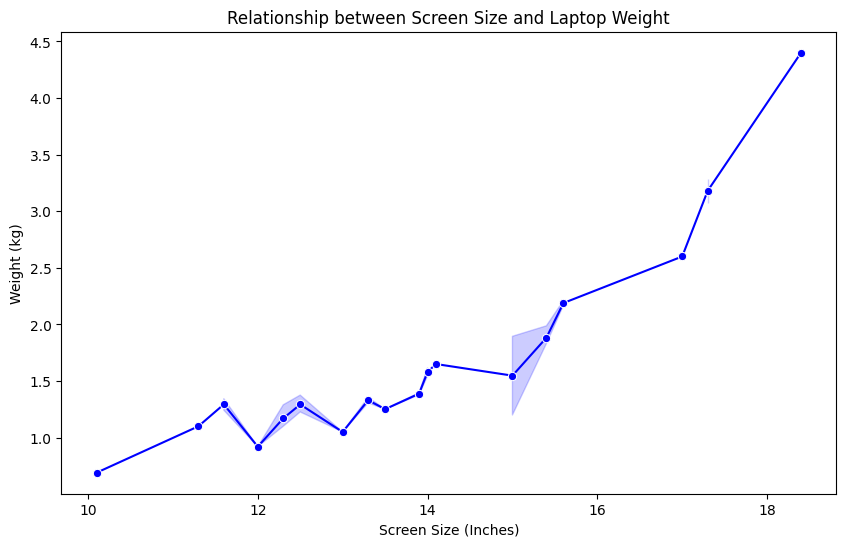

In [8]:
# What is the relationship between screen size and laptop weight?
# plot line plot to show the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Inches', y='Weight (kg)', data=comp_df, marker='o', color='b')
plt.title('Relationship between Screen Size and Laptop Weight')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Weight (kg)')
plt.show()